In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools.model_module import Model_Module

ModuleNotFoundError: No module named 'tools.CNN'

In [2]:
model_module = Model_Module("model_keras")

[INFO] Waitting for load model...
[INFO] Done!


In [3]:
data = pd.read_csv("data1/data.csv")
data.head()

,img_path,command,speed,turn
0,images/0.jpg,0,60,0
1,images/1.jpg,0,60,0
2,images/2.jpg,0,60,0
3,images/3.jpg,0,60,0
4,images/4.jpg,0,60,0


In [4]:
data["img_path"] = data.apply(lambda row: "data1/" + row["img_path"], axis=1)
print(data.head())
print(data.shape)

             img_path  command  speed  turn
0  data1/images/0.jpg        0     60     0
1  data1/images/1.jpg        0     60     0
2  data1/images/2.jpg        0     60     0
3  data1/images/3.jpg        0     60     0
4  data1/images/4.jpg        0     60     0
(2431, 4)


In [5]:
tmp = pd.read_csv("data2/data.csv")
tmp.head()

,img_path,command,speed,turn
0,images/0.jpg,0,60,0
1,images/1.jpg,0,60,0
2,images/2.jpg,0,60,0
3,images/3.jpg,0,60,0
4,images/4.jpg,0,60,0


In [6]:
tmp["img_path"] = tmp.apply(lambda row: "data2/" + row["img_path"], axis=1)
print(tmp.head())
print(tmp.shape)

             img_path  command  speed  turn
0  data2/images/0.jpg        0     60     0
1  data2/images/1.jpg        0     60     0
2  data2/images/2.jpg        0     60     0
3  data2/images/3.jpg        0     60     0
4  data2/images/4.jpg        0     60     0
(2226, 4)


In [7]:
print(data.shape)
print(tmp.shape)

(2431, 4)
(2226, 4)


In [8]:
data = pd.concat([data, tmp], ignore_index = True)
data.shape

(4657, 4)

In [9]:
fliter1 = (data["command"] != 0) 
fliter2 = (data["command"] != 2)
data = data[(fliter1 & fliter2)]
data.shape

(4148, 4)

In [10]:
data = data.sample(frac=1, random_state=3).reset_index(drop=True)
data.head()

,img_path,command,speed,turn
0,data1/images/1461.jpg,1,100,0
1,data2/images/730.jpg,4,100,1
2,data2/images/1262.jpg,1,60,0
3,data1/images/32.jpg,3,100,1
4,data1/images/228.jpg,1,60,0


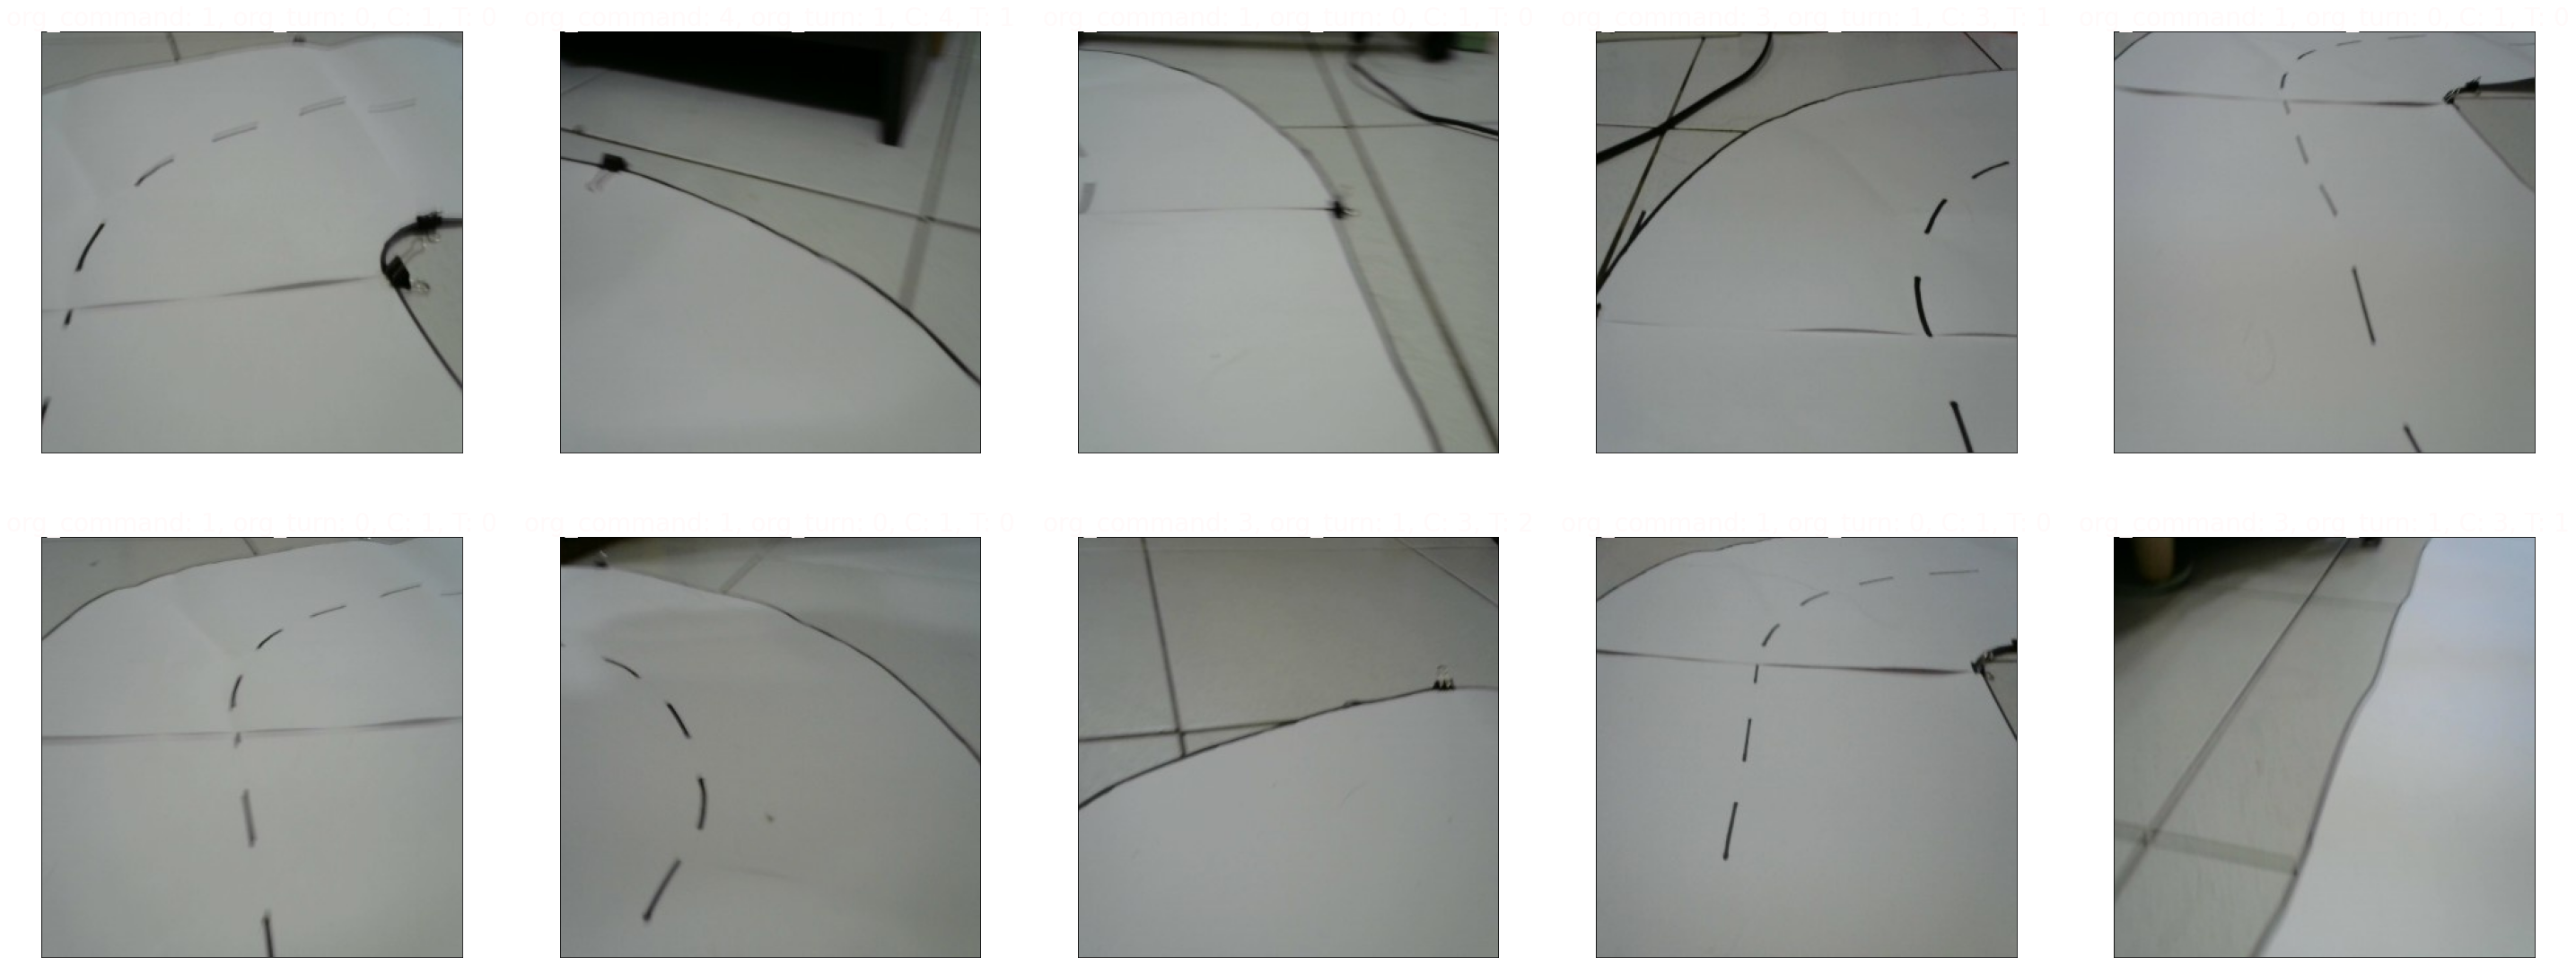

In [12]:
fig = plt.gcf()
fig.set_size_inches(50, 50)
for i in range(0, 10):
    ax = plt.subplot(5, 5, 1 + i)
    ax.imshow(plt.imread(data["img_path"][i]))
    pre = model_module.predict(data["img_path"][i], data["speed"][i])
    title = "org_command: {}, org_turn: {}, C: {}, T: {}".format(data["command"][i], data["turn"][i], 
    pre.command, pre.turn)
    ax.set_title(title, fontsize = 28, color = "snow")
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
data["pre_command"] = 0
data["pre_turn"] = 0
data.head()

,img_path,command,speed,turn,pre_command,pre_turn
0,data1/images/1461.jpg,1,100,0,0,0
1,data2/images/730.jpg,4,100,1,0,0
2,data2/images/1262.jpg,1,60,0,0,0
3,data1/images/32.jpg,3,100,1,0,0
4,data1/images/228.jpg,1,60,0,0,0


In [16]:
def predict_data(row):
    if (pd.notnull(row["pre_command"]) or pd.notnull(row["pre_turn"])):
        pre = model_module.predict(row["img_path"], row["speed"])
        row["pre_command"] = pre.command
        row["pre_turn"] = pre.turn
    else:
        print("error")
    return row

In [17]:
data = data.apply(predict_data, axis = 1)
data.head()

,img_path,command,speed,turn,pre_command,pre_turn
0,data1/images/1461.jpg,1,100,0,1,0
1,data2/images/730.jpg,4,100,1,4,1
2,data2/images/1262.jpg,1,60,0,1,0
3,data1/images/32.jpg,3,100,1,3,1
4,data1/images/228.jpg,1,60,0,1,0


In [18]:
pd.crosstab(data["command"],data["pre_command"],rownames=["label"],colnames=["predict"])

predict,1,3,4
label,,,
1,1732,39,22
3,36,1399,3
4,14,3,900


In [19]:
pd.crosstab(data["turn"],data["pre_turn"],rownames=["label"],colnames=["predict"])

predict,0,1,2
label,,,
0,1744,11,43
1,38,944,295
2,22,190,861
